# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 10
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = (x - a/2)^2 + (y - a/2)^2
Apot(x, y, z) = .2 * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
C = 500.0
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.692070e+01     1.375843e+01
 * time: 0.0015480518341064453
     1     2.976856e+01     5.270713e+00
 * time: 0.006489992141723633
     2     2.488207e+01     4.213411e+00
 * time: 0.011255025863647461
     3     2.137599e+01     2.336668e+00
 * time: 0.016314029693603516
     4     2.106897e+01     3.501194e+00
 * time: 0.020442962646484375
     5     2.040746e+01     2.164692e+00
 * time: 0.025502920150756836
     6     1.937631e+01     2.391438e+00
 * time: 0.029551982879638672
     7     1.917155e+01     1.852479e+00
 * time: 0.03364396095275879
     8     1.850805e+01     1.480718e+00
 * time: 0.03772401809692383
     9     1.816657e+01     1.635512e+00
 * time: 0.041857004165649414
    10     1.793447e+01     1.183670e+00
 * time: 0.04588794708251953
    11     1.778109e+01     7.964371e-01
 * time: 0.049844980239868164
    12     1.765344e+01     1.021211e+00
 * time: 0.05318188667297363
    13     1.761865e+01     9.993032e-0

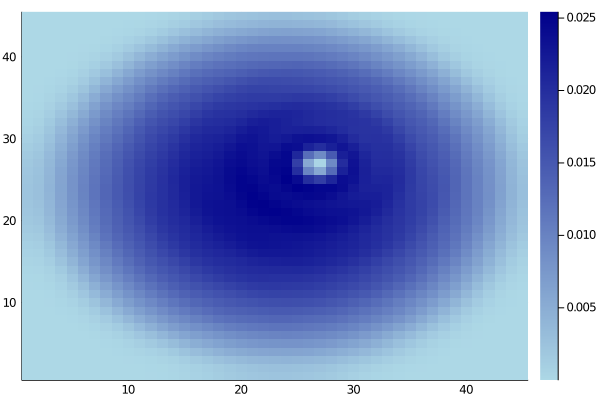

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut)
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ.real[:, :, 1], c=:blues)